**Ссылка на репозиторий:** https://github.com/Kuuuzya/SupervisedLearning

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Передо мной поставлена задача об анализе исторических данных клиентов Бета-банка. Необходимо проанализировать датасет и с помощью машинного обучения спрогнозировать, уйдёт клиент из банка или нет, чтобы в дальнейшем руководители подразделений смогли предпринять те или иные шаги. Для начала загрузим данные и изучим их.

In [1]:
#Все импорты, а их будет много, собираю тут, перезапуская ячейку при необходимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix,f1_score, recall_score, precision_score, precision_recall_curve,roc_curve, roc_auc_score 
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
#попробуем считать датасет из файла и положить в переменную. Выдадим ошибку, если это не получится.
try:
    data = pd.read_csv('./Churn.csv')
    print('Датасет загружен в переменную data')
except:
    print('Не удалось загрузить датасет')

Датасет загружен в переменную data


In [3]:
#Посмотрим на размер датасета
data.shape[0]

10000

10 тысяч записей. Не идеально, но неплохо, есть, с чем работать. 
Посмотрим, что там с колонками и все ли данные у нас есть

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Неплохо, бывали датасеты в этом курсе и похуже. 
Проблема только с колонкой Tenure — сколько лет клиент был в банке.
Посмотрим на датасет глазами.

In [5]:
data.head(50)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Всё чистенько. Но пропуски надо заполнить. Логичным здесь будет заполнение средним значением по колонке.
Можно, конечно, подставлять среднее по городам или по сегментам зарплат, или по полу. Но это менее 10%,
так что в данном случае можно пренебречь. Проверим, что у нас там со средним.

In [6]:
data['Tenure'].mean()

4.997690023099769

Почти 5 лет клиент банка. Выглядит логичным, на работу моделей сильно повлиять не должно.
Округлим до 5, чтобы данные были однородными, а то остальные-то все целые.

In [7]:
data['Tenure'] = data['Tenure'].fillna(5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
data['Tenure'].mean()

4.9979

И пропусков нет, и среднее почти не изменилось. Зато теперь можно работать с датасетом дальше.

У нас в датасете есть 3 колонки категориальные. А модели машинного обучения (в нашем случае) с таким работать не умеют. Поэтому переведём их в дамми признаки.

А фамилии и номера строк вообще удалим, они нам для модели вообще не нужны!

In [10]:
data = data.drop(columns = ['Surname'], axis=1)
data = data.drop(columns = ['RowNumber'], axis=1)

In [11]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [12]:
data_ohe.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Теперь мы получили довольно много колонок (привет, фамилии), зато теперь машинное обучение с этим справится. Давайте попробуем несколько методов и посмотрим, получится ли у нас предсказать результат.

P.S. Ах да, у нас ещё есть потрясающая колонка CustomerID, которая ничего особо не даёт, но алгоритмы на неё точно будут ориентироваться, ведь это число. Да, по нему можно вычислить, насколько давно с нами клиент, но у нас есть параметр Tenure. Так что, думаю, что от номера клиента точно можно избавиться без сожаления.

In [13]:
data_ohe = data_ohe.drop(columns = ['CustomerId'], axis=1)

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Спасибо, интересное решение, но мне надо вчитаться и понять.</div>

In [14]:
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Вот теперь всё должно быть хорошо. Кроме дисбаланса, но его мы проверим чуть позже и придумаем, как с ним быть.

## Исследование задачи

Что ж, мы получили чистенький датасет, попробуем загнать его в модель решающего дерева и посмотреть, вдруг уже всё хорошо и ничего делать не нужно. Для этого разобьём датасет на обучающую и валидационную выборки. Целевой признак у нас — это Exited, ушёл клиент из банка или нет (1 - ушёл, 0 - не ушел)

In [15]:
#разбиваем датасет на выборку и целевой признак
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'] , axis=1)

#разбиваем выборку и целевой признак на две части 75/25
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345)

features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

In [16]:
print('Размер train:',features_train.shape[0])
print('Размер valid:',features_valid.shape[0])
print('Размер test:',features_test.shape[0])

Размер train: 6000
Размер valid: 2000
Размер test: 2000


Разбили выборки на 60,20 и 20%.

Т.к. у признаков разный масштаб, а именно, у нас есть возраст и зарплата, например. У них разные порядки. Чтобы привести всё к единому виду, сделаем масштабирование признаков.

In [17]:
data_ohe.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [19]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [20]:
pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [21]:
features_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,2,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,1,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.454209,0.358435,1,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.092511,0.651725,1,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,2,1,1,0.801922,0,0,0


Конечно, возраст не может быть отрицательным, как и количество лет в банке и зарплата. Но теперь все наши признаки отмасштабированы и они будут корректно влиять на модель.

In [22]:
#Начнём с логистической регресси
try:
    model_LR = LogisticRegression(random_state=12345, solver='liblinear')
    model_LR.fit(features_train, target_train)
    print('Модель логистической регрессии обучена!')
except:
    print('Модель не обучена, ищи ошибки!')

Модель логистической регрессии обучена!


In [23]:
#Проверим, как модель предсказывает результаты
predicted_valid_LR = model_LR.predict(features_valid)

# print("R2 на предсказаниях: ", r2_score(target_valid, predicted_valid_LR))
# print("R2 на обучающей выборке: ", model_LR.score(features_train, target_train))
# print("R2 на валидационной выборке: ", model_LR.score(features_valid, target_valid))

print("F1: ", f1_score(target_valid, predicted_valid_LR))

F1:  0.3012259194395797


 ~~Метрика R2 отрицательная, хоть и около 0, но это всё равно говорит об очень низком качестве модели. А вот на обучающей и валидационной выборке всё ок. Попробуем модель решающего дерева и случайного леса. ~~

Метрика F1 низкая. Значит, эта модель нам не подойдёт. Попробуем дерево.

In [24]:
try:
    model_DTC = DecisionTreeClassifier(random_state=12345)
    model_DTC.fit(features_train, target_train)
    print('Модель обучающего дерева обучена!')
except:
    print('Модель не обучена, ищи ошибки!')

Модель обучающего дерева обучена!


In [25]:
#Проверим, как модель предсказывает результаты
predicted_valid_DTC = model_DTC.predict(features_valid)

# print("R2 на предсказаниях: ", r2_score(predicted_valid_DTC, target_valid))
# print("R2 на обучающей выборке: ", model_DTC.score(features_train, target_train))
# print("R2 на валидационной выборке: ", model_DTC.score(features_valid, target_valid))

print("F1: ", f1_score(target_valid, predicted_valid_DTC))

F1:  0.5159763313609468


А вот тут F1 уже неплохая, больше 0.5, при целевом 0.59 это очень неплохое значение.

 ~~Лучше, но всё равно отрицательное значение, что очень плохо. Попробуем случайный лес, причём сразу с перебором параметров. ~~

In [26]:
# model_RFR = RandomForestRegressor(random_state=12345, n_estimators=2, max_depth=5)
# model_RFR.fit(features_train, target_train)
# predicted_valid_RFR = model_RFR.predict(features_valid)

    
# print("F1: ", f1_score(target_valid, predicted_valid_RFR))

In [43]:
%%time
best_depth = 0
best_est = 0
#best_r2 = -1
best_f1 = 0

for depth in range(1,20,1):
    for est in range(20,100,10):
        model_RFC = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_RFC.fit(features_train, target_train)
        predicted_valid_RFC = model_RFC.predict(features_valid)
       
#if f1_score(target_valid,predicted_valid_RFC) > best_f1 :
#         #best_r2 = r2_score(predicted_valid_RFR, target_valid)
#         best_f1 = f1_score(target_valid,predicted_valid_RFC)
#         best_depth = depth
#         best_est = est
#         model_RFC = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
#         model_RFC.fit(features_train, target_train)
#         predicted_valid_RFC = model_RFC.predict(features_valid)
        
    if f1_score(target_valid,predicted_valid_RFC) > best_f1 :
        best_f1 = f1_score(target_valid,predicted_valid_RFC)
        best_depth = depth
        best_est = est
        best_model = model_RFC
        best_predict_val = predicted_valid_RFC
        print(best_f1)

print('Модель случайного леса')
print('Лучшая глубина: ', best_depth)
print('Лучшее кол-во: ', best_est)
# print('R2 на предсказаниях: ', best_r2)
# print("R2 на обучающей выборке: ", model_RFR.score(features_train, target_train))
# print("R2 на валидационной выборке: ", model_RFR.score(features_valid, target_valid))
print('F1: ', best_f1)

0.10222222222222221
0.19583333333333333
0.327683615819209
0.4332755632582322
0.5153970826580228
0.5337620578778134
0.5374999999999999
0.553323029366306
0.5619335347432024
0.5627836611195159
0.5658682634730539
0.5756676557863502
0.5773195876288659
0.5794117647058823
Модель случайного леса
Лучшая глубина:  18
Лучшее кол-во:  90
F1:  0.5794117647058823
CPU times: user 43.1 s, sys: 294 ms, total: 43.4 s
Wall time: 43.4 s


In [44]:
f1_score(target_valid,best_predict_val)

0.5794117647058823

Получили 0.57, что уже очень и очень неплохо. Дальше, значит, надо работать со случайным лесом на глубине 17 и 80 деревьями.

~~Выше я закомментировал код, т.к. он долго выполняется. Чтобы вы не тратили время на проверку, вот результаты, которые у меня получились.~~

~~
Модель случайного леса
Лучшая глубина:  9
Лучшее кол-во:  60
R2 на предсказаниях:  -0.7142392066291492
R2 на обучающей выборке:  0.5304141028148517
R2 на валидационной выборке:  0.37344763273842085
CPU times: user 2min 34s, sys: 2.48 s, total: 2min 37s
Wall time: 2min 37s \
~~

~~Результаты неутешительные. Самые хорошие результаты получились у модели решающего дерева и логистической регрессии. Проверим, что у них с F1-мерой, выберем лучший и пойдём дальше.~~

In [28]:
print('Дерево')
print('Матрица ошибок')
print(confusion_matrix(target_valid, predicted_valid_DTC))
print('Полнота: ', recall_score(target_valid, predicted_valid_DTC))
print('Точность: ', precision_score(target_valid, predicted_valid_DTC))
print('F1-мера: ', f1_score(target_valid, predicted_valid_DTC))
print('')

print('Логистическая регрессия')
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid_LR))
print('Полнота: ', recall_score(target_valid, predicted_valid_LR))
print('Точность: ', precision_score(target_valid, predicted_valid_LR))
print('F1-мера: ', f1_score(target_valid, predicted_valid_LR))
print('')

#добавил лес
print('Случайный лес')
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid_RFC))
print('Полнота: ', recall_score(target_valid, predicted_valid_RFC))
print('Точность: ', precision_score(target_valid, predicted_valid_RFC))
print('F1-мера: ', f1_score(target_valid, predicted_valid_RFC))

Дерево
Матрица ошибок
[[1373  200]
 [ 209  218]]
Полнота:  0.5105386416861827
Точность:  0.5215311004784688
F1-мера:  0.5159763313609468

Логистическая регрессия
Матрица ошибок:
[[1515   58]
 [ 341   86]]
Полнота:  0.20140515222482436
Точность:  0.5972222222222222
F1-мера:  0.3012259194395797

Случайный лес
Матрица ошибок:
[[1518   55]
 [ 235  192]]
Полнота:  0.4496487119437939
Точность:  0.7773279352226721
F1-мера:  0.56973293768546


Модель леса устраивает нас больше всех. Тут и полнота с точностью приняли хорошие значения значения, и F1-мера, метрика качества классификации, гораздо ближе к требуемому значению в 0.59. С этим можно поработать.

## Борьба с дисбалансом

К сожалению, у нас несбалансированы значения в датасете. Мы это выяснили ещё на старте, но по заданию с дисбалансом нужно разбираться только здесь. Для начала давайте попробуем взвесить классы в модели логистической регрессии.

In [29]:
#Логистическая регрессия с балансом
try:
    model_LR_b = LogisticRegression(class_weight='balanced', random_state = 12345, solver='liblinear')
    model_LR_b.fit(features_train, target_train)
    predicted_valid_LR_b = model_LR_b.predict(features_valid)
    print('Модель логистической регрессии с балансом обучена!')
except:
    print('Модель не обучена, ищи ошибки!')

Модель логистической регрессии с балансом обучена!


In [30]:
#и то же самое с деревом
try:
    model_DTC_b = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
    model_DTC_b.fit(features_train, target_train)
    predicted_valid_DTC_b = model_DTC_b.predict(features_valid)
    print('Модель обучающего дерева c балансом обучена!')
except:
    print('Модель не обучена, ищи ошибки!')

Модель обучающего дерева c балансом обучена!


In [31]:
#ну и лес тоже теперь
try:
    model_RFC_b = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=18, class_weight='balanced')
    model_RFC_b.fit(features_train, target_train)
    predicted_valid_RFC_b = model_RFC_b.predict(features_valid)
    print('Модель случайного леса с балансом обучена!')
except:
    print('Модель не обучена!')

Модель случайного леса с балансом обучена!


In [32]:
print('Дерево с весами')
print('Матрица ошибок')
print(confusion_matrix(target_valid, predicted_valid_DTC_b))
print('Полнота: ', recall_score(target_valid, predicted_valid_DTC_b))
print('Точность: ', precision_score(target_valid, predicted_valid_DTC_b))
print('F1-мера: ', f1_score(target_valid, predicted_valid_DTC_b))
print('')

print('Логистическая регрессия с весами')
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid_LR_b))
print('Полнота: ', recall_score(target_valid, predicted_valid_LR_b))
print('Точность: ', precision_score(target_valid, predicted_valid_LR_b))
print('F1-мера: ', f1_score(target_valid, predicted_valid_LR_b))
print('')
#добавил лес
print('Случайный лес')
print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid_RFC_b))
print('Полнота: ', recall_score(target_valid, predicted_valid_RFC_b))
print('Точность: ', precision_score(target_valid, predicted_valid_RFC_b))
print('F1-мера: ', f1_score(target_valid, predicted_valid_RFC_b))

Дерево с весами
Матрица ошибок
[[1385  188]
 [ 217  210]]
Полнота:  0.4918032786885246
Точность:  0.5276381909547738
F1-мера:  0.509090909090909

Логистическая регрессия с весами
Матрица ошибок:
[[1107  466]
 [ 127  300]]
Полнота:  0.702576112412178
Точность:  0.391644908616188
F1-мера:  0.5029337803855826

Случайный лес
Матрица ошибок:
[[1519   54]
 [ 241  186]]
Полнота:  0.43559718969555034
Точность:  0.775
F1-мера:  0.5577211394302849


Логистической регрессии балансировка этим методом помогла приблизиться к 0.5 для F1-меры, но дерево всё равно лучше, а лес ещё лучше. У него уже параметр F1 – 0.5681

Мы опробуем два метода - апсэмплинг и даунсэмплинг выборок. Начнём с увеличения.

In [33]:
#функция увеличения выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [34]:
target_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

Положительных значений - 1219, нулевых - 4781. Значит, нам нужно умножить положительные на 4, чтобы сбалансировать выборку.

In [35]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [36]:
target_upsampled.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

Теперь количество нулей и единиц соотносится, и они у нас разбросаны случайно. Можно работать дальше!

In [37]:
print(features_upsampled.shape)
print(target_upsampled.shape)

print(features_train.shape)
print(target_train.shape)

(9657, 11)
(9657,)
(6000, 11)
(6000,)


In [39]:
# try:
#     model_DTC_b = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
#     model_DTC_b.fit(features_upsampled,target_upsampled)
#     predicted_valid_DTC_b = model_DTC_b.predict(features_valid)
#     print('Модель обучающего дерева c увеличенной выборкой обучена!')
# except:
#     print('Модель не обучена, ищи ошибки!')

In [40]:
# print("F1 up:", f1_score(target_valid, predicted_valid_DTC_b))

In [1]:
#обучим модель на апсемплинговой выборке
try:
    model_RFC_b = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=18, class_weight='balanced')
    model_RFC_b.fit(features_upsampled,target_upsampled)
    predicted_valid_RFC_b = model_RFC_b.predict(features_valid)
    print('Модель случайного леса с балансом и апсемплингом обучена!')
except:
    print('Модель не обучена!')

Модель не обучена!


In [48]:
 print("F1 up:", f1_score(target_valid, predicted_valid_RFC_b))

F1 up: 0.590728476821192


Ого! Получили 0.59. Кажется, это то, чно нам нужно.
Попробуем ещё другое изменение выборки, вдруг будет лучше. А потом попробуем даунсэмплинг. Data science – это же эээксперименты!

In [43]:
# best_f1 = 0
# best_rep = 0
# #перебрал разные параметры, эти оказались лучшими
# for rep in range(2,20,1):
#     features_upsampled, target_upsampled = upsample(features_train, target_train, rep)
#     try:
#         model_DTC_b = DecisionTreeClassifier(class_weight='balanced',random_state=12345)
#         model_DTC_b.fit(features_upsampled,target_upsampled)
#         predicted_valid_DTC_b = model_DTC_b.predict(features_valid)
#         #print(rep, 'Модель обучающего дерева c увеличенной выборкой обучена!')
#     except:
#         print('Модель не обучена, ищи ошибки!')
#     if f1_score(target_valid, predicted_valid_DTC_b) > best_f1:
#         best_rep = rep
#         best_f1 = f1_score(target_valid, predicted_valid_DTC_b)
#         print("F1 ", best_rep," up:", f1_score(target_valid, predicted_valid_DTC_b))
        
# print("Лучший F1 ", best_rep," up:", best_f1)

In [49]:
best_f1 = 0
best_rep = 0
#перебрал разные параметры, эти оказались лучшими
for rep in range(2,15,1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, rep)
    try:
        model_RFC_b = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14, class_weight='balanced')
        model_RFC_b.fit(features_upsampled,target_upsampled)
        predicted_valid_RFC_b = model_RFC_b.predict(features_valid)
        #print(rep, 'Модель обучающего дерева c увеличенной выборкой обучена!')
    except:
        print('Модель не обучена, ищи ошибки!')
    if f1_score(target_valid, predicted_valid_RFC_b) > best_f1:
        best_rep = rep
        best_f1 = f1_score(target_valid, predicted_valid_RFC_b)
        print("F1 ", best_rep," up:", f1_score(target_valid, predicted_valid_RFC_b))
        
print("Лучший F1 ", best_rep," up:", best_f1)

F1  2  up: 0.5992317541613316
F1  3  up: 0.6222222222222221
F1  4  up: 0.6223862238622385
F1  5  up: 0.6224366706875754
F1  6  up: 0.6267942583732057
F1  8  up: 0.6395209580838325
Лучший F1  8  up: 0.6395209580838325


По сравнению со сбалансированной выборкой, можем получить лучший результат на 8 повторениях вместо 4. Но потеряем в скорости выполнения. Поэтому, оставим сбалансированный вариант с апсемплингом в 4 раза, это и логичнее, и результат хороший.

Мы примем итоговый результат в 0.62238 на 4 повторениях. Посмотрим, что можно сделать с даунсемплингом.

In [50]:
#функция уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [51]:
target_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

Не знаю, зачем я ещё раз проверяю. Нулей у нас в 4 раза больше. Значит, нужно сделать их в 4 раза меньше, чтобы сбалансировать выборку. Коэффициент будет 0.25.

In [52]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [53]:
target_downsampled.value_counts()

1    1219
0    1195
Name: Exited, dtype: int64

Так-то лучше!

In [54]:
# try:
#     model_DTC_b = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
#     model_DTC_b.fit(features_downsampled,target_downsampled)
#     predicted_valid_DTC_b = model_DTC_b.predict(features_valid)
#     print('Модель обучающего дерева c уменьшенной выборкой обучена!')
# except:
#     print('Модель не обучена, ищи ошибки!')

In [55]:
# print("F1 down:", f1_score(target_valid, predicted_valid_DTC_b))

In [56]:
#обучим модель на даунсемплинговой выборке
try:
    model_RFC_b = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14, class_weight='balanced')
    model_RFC_b.fit(features_downsampled,target_downsampled)
    predicted_valid_RFC_b = model_RFC_b.predict(features_valid)
    print('Модель случайного леса с балансом и даунсемплингом обучена!')
except:
    print('Модель не обучена!')

Модель случайного леса с балансом и даунсемплингом обучена!


In [57]:
 print("F1 up:", f1_score(target_valid, predicted_valid_RFC_b))

F1 up: 0.5929919137466307


И здесь получили подходящий задаче параметр F1 в 0.59. Попробуем поиграться с параметром. Ну так, для практики.

In [53]:
# #попробуем тоже поиграть с параметрами. Стартуем сразу с F1 = 0.5, меньше нам вообще неинтересно
# best_f1 = 0.5
# best_fr = 0

# #перебрал разные параметры, эти оказались лучшими
# for fr in np.arange(0.1,0.5,0.005):
#     features_downsampled, target_downsampled = downsample(features_train, target_train, fr)
#     try:
#         model_DTC_b = DecisionTreeClassifier(random_state=12345)
#         model_DTC_b.fit(features_downsampled,target_downsampled)
#         predicted_valid_DTC_b = model_DTC_b.predict(features_valid)
#         #print(round(fr,2),'Модель обучающего дерева c уменьшенной выборкой обучена!')
#     except:
#         print('Модель не обучена, ищи ошибки!')
        
#     if f1_score(target_valid, predicted_valid_DTC_b) > best_f1:
#         best_fr = fr
#         best_f1 = f1_score(target_valid, predicted_valid_DTC_b)
#         print("F1 ", round(fr,3)," up:", f1_score(target_valid, predicted_valid_DTC_b))

# print("Лучший F1 ", round(best_fr,3)," up:", best_f1)

In [58]:
#попробуем тоже поиграть с параметрами. Стартуем сразу с F1 = 0.59, меньше нам вообще неинтересно
best_f1 = 0.59
best_fr = 0

#перебрал разные параметры, эти оказались лучшими
for fr in np.arange(0.25,0.5,0.005):
    features_downsampled, target_downsampled = downsample(features_train, target_train, fr)
    try:
        model_RFC_b = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14, class_weight='balanced')
        model_RFC_b.fit(features_downsampled,target_downsampled)
        predicted_valid_RFC_b = model_RFC_b.predict(features_valid)
        #print(round(fr,2),'Модель обучающего дерева c уменьшенной выборкой обучена!')
    except:
        print('Модель не обучена, ищи ошибки!')
        
    if f1_score(target_valid, predicted_valid_RFC_b) > best_f1:
        best_fr = fr
        best_f1 = f1_score(target_valid, predicted_valid_RFC_b)
        print("F1 ", round(fr,3)," up:", f1_score(target_valid, predicted_valid_RFC_b))

print("Лучший F1 ", round(best_fr,3)," up:", best_f1)

F1  0.25  up: 0.5929919137466307
F1  0.255  up: 0.5969615728328865
F1  0.26  up: 0.5974499089253188
F1  0.265  up: 0.6169617893755825
F1  0.28  up: 0.6177606177606177
F1  0.305  up: 0.6183282980866062
F1  0.36  up: 0.621196222455404
F1  0.365  up: 0.6220806794055201
F1  0.385  up: 0.6235167206040991
F1  0.435  up: 0.6279329608938548
F1  0.49  up: 0.63121387283237
Лучший F1  0.49  up: 0.63121387283237


Шикарно. Достигли показателя F1 - 0.6312 при уменьшении количества нулей в выборке почти в 2 раза вместо 4 раз. Это улучшение, т.к. мы не так сильно изменяем исходные данные, значит, за итоговый результат возьмём следующее:**
- Лучшая модель: Случайный лес
- Глубина: 14
- Количество деревьев: 80
- Баланс: с помощью даунсэмплинга в 2 раза (0.455)
- F1: 0.632302405

~~Мне не удалось достичь требуемого по заданию показателя в 0.59. Возможно, я не учёл все параметры балансировки или не вспомнил о каких-то методах, которые позволят это сделать. Но результат 0.5838 считаю хорошим, поэтому сделаю тестирование этой модели и буду надеяться, что ревьювер подскажет, где я ошибся (хотя в реальном проекте такого не будет, но мы же здесь только учимся, правда?).~

## Тестирование модели

Посмотрим на результаты тестирования модели различными методами. Сначала только ещё раз перезапустим модель, чтобы точно работать с тем, что мы выбрали.

In [60]:
%%time
try:
    features_downsampled, target_downsampled = downsample(features_train, target_train, 0.49)
    model = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=14, class_weight='balanced')
    model.fit(features_downsampled,target_downsampled)
    predicted_test = model.predict(features_test)
    print('Итоговая модель обучена, предсказания сделаны')
except:
    print('Что-то пошло не так!')

print('F1 test:', f1_score(target_test, predicted_test))

Итоговая модель обучена, предсказания сделаны
F1 test: 0.5938650306748468
CPU times: user 352 ms, sys: 24.1 ms, total: 377 ms
Wall time: 374 ms


In [63]:
print('F1:',f1_score(target_test, predicted_test))
print('Точность:',precision_score(target_test, predicted_test))
print('Полнота:',recall_score(target_test, predicted_test))

F1: 0.5938650306748468
Точность: 0.5707547169811321
Полнота: 0.618925831202046


Неидеально, конечно. Мы предсказываем верно, что человек уйдёт, в 61% случаях. Идеально было бы 100%, но это скорее всего невозможно.

In [64]:
predictions_train = model.predict(features_train)
predictions_valid = model.predict(features_valid) 

print("MAE на обучающей выборке: ", mean_absolute_error(target_train,predictions_train))
print("MAE на валидационной выборке: ", mean_absolute_error(target_valid, predictions_valid))
print("MAE на тестовой выборке: ", mean_absolute_error(target_test, predicted_test))

MAE на обучающей выборке:  0.0455
MAE на валидационной выборке:  0.1595
MAE на тестовой выборке:  0.1655


В среднем, мы ошибаемся на 0.16. Т.к. наши значения это 0 и 1, то можно сказать, что мы ошибаемся и в случае 0, и в случае 1, то есть, суммарно около 32%, что как раз соответствует полноте предсказаний.

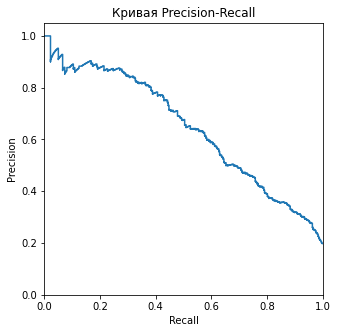

In [65]:
probabilities_test = model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

plt.figure(figsize=(5, 5))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

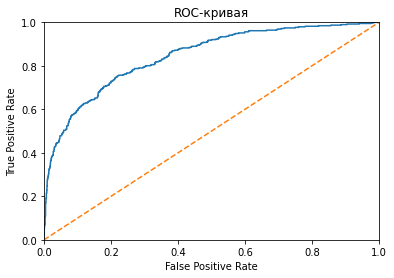

In [66]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure()

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show();

In [60]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(auc_roc);

0.8412359188007357


Наша модель отличается от случайной и это прекрасно. Значит, она предсказывает иначе. И т.к. она лежит сверху от случайного графика, то и предсказывает она лучше. Площадь под графиком нашей моделью равна 0.84, а у случайной модели — 0.5. Значит, мы на 34% лучше предсказываем результат. Неидеально, но для теста, на мой взгляд, весьма неплохо. 

А если нам удастся поработать с 60% клиентов, кто хочет уйти и хотя бы 50% оставить (мы не знаем процент конверсии, но пусть будет такой), это очень и очень неплохо, согласитесь!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*